# Python: Everything
- 26) **Create callable instances with magic method $\_ call \_$:** 
<br>----------------------------------------------
<br> https://www.pinterest.com/HamedShahHosseini/programming-languages/
<br>https://github.com/ostad-ai/Python-Everything

**Callable:** is an object that can be called like a function in Python. To create a callable object, we define a custom class in which we implement the $\_ call \_$ magic method.
<Br>Hint: To check if an object is callable or not, we employ the built-in function **callable()**.
<br> With callable classes, we can keep the **state** between calls, hold in memory the values obtained so far by calling the object, or writing user-friendly APIs.

A simple callable object is created below. We define a callable class to compute a base raised to the given power (exponent):

In [40]:
# a base to the power given at the instantiation 
class Power:
    def __init__(self,pow=2):
        self.pow=pow
    def __call__(self,base):
        return base**self.pow
power_2=Power()
power_3=Power(3)
x=5
# calling class instance like a function
print(f'{x} to the power 2 is: {power_2(x)}')
print(f'{x} to the power 3 is: {power_3(x)}')

5 to the power 2 is: 25
5 to the power 3 is: 125


Let's define a callable class for polynomials

In [38]:
# polynomial is a0+a1*x+a2*x^2+a3*x^3+...
# coefficients=[a0,a1,a2,a3,...]
class Poly:
    def __init__(self,*coefficients):
        self.coeffs=coefficients
    def __call__(self,x):
        result=0
        for power,coeff in enumerate(self.coeffs):
            result+=coeff*x**power
        return result
p1=Poly(1,2,3) # 1+2x+3x^2
x=2.2
print(f'The value of polynomial at x={x} is: {p1(x)}')
x=0
print(f'The value of polynomial at x={x} is: {p1(x)}')

The value of polynomial at x=2.2 is: 19.92
The value of polynomial at x=0 is: 1


Having a callable class to define a **line** by ite slope and intercept:

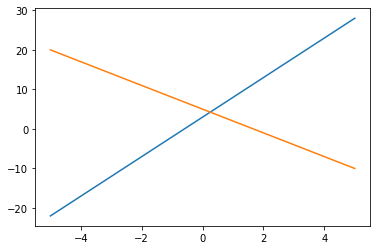

In [22]:
import numpy as np
from matplotlib import pyplot as plt
# define line as: y=mx+b
class Line:
    def __init__(self,slope,intercept):
        self.m=slope
        self.b=intercept
    def __call__(self,x):
        return self.m*x+self.b
line1=Line(5,3); line2=Line(-3,5)
xs=np.linspace(-5,5,100)
line1_np,line2_np=np.vectorize(line1),np.vectorize(line2)
plt.plot(xs,line1_np(xs))
plt.plot(xs,line2_np(xs))
plt.show()

In the following, we define a callable class which computs the average of a stream of numeric values.
<br>One way is to divide the summation of the all values by the number of values. But, there is a better way to compute a running average by:
<br>$average_{new}=\frac{1}{n+1}(average_{old}\cdot n+value_{new})$, where $n$ is the number of values before the new value comes.

In [14]:
class Average:
    def __init__(self):
        self.n=0
        self.average=None
    def __call__(self,value):        
        if self.n==0:
            self.average=value
        else:
            self.average=(self.average*self.n+value)/(self.n+1)
        self.n+=1
        return self.average
    
# creating an instance of a class
ave_stream=Average()
# calling the class instance, like a function
numbers=[5,3,10]
for i in range(len(numbers)):
    print(f'{ave_stream(numbers[i])} is average of {numbers[:i+1]}')

5 is average of [5]
4.0 is average of [5, 3]
6.0 is average of [5, 3, 10]
